In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS, same_color
import pickle
import sys
import glob 
import os
import re

def find_data(datadir,wdet):
    data = []    
    for (root, dirs, files) in os.walk(datadir):
        for file in files:
            if wdet in file:
                file_path = os.path.join(root, file)
                data.append(file_path)
    return data

def extract_number(file):
    m = re.search(r"ox_([+-]?\d+\.\d+)", file)
    return float(m.group(1)) if m else 0.0

def extract_number2(file):
    m = re.search(r"o1-(\d+\.\d+)", file)
    return float(m.group(1)) if m else 0.0 


# BSE

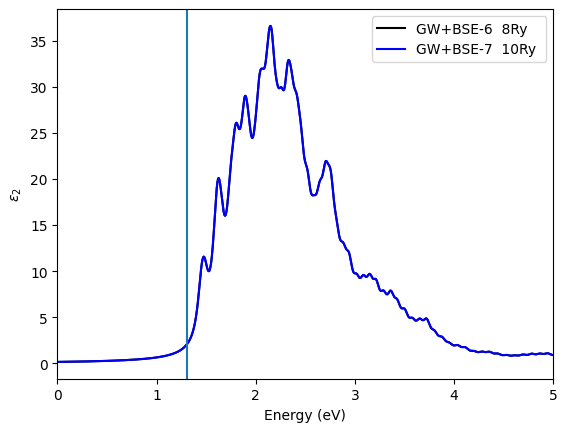

In [23]:
bse6 = np.loadtxt("BSE/bse-eps-outputs/o-bse_6_run.eps_q1_haydock_bse")
bse7 = np.loadtxt("BSE/bse-eps-outputs/o-bse_7_run.eps_q1_haydock_bse")


plt.plot(bse6[:,0],bse6[:,1],"k",label="GW+BSE-6  8Ry ")
plt.plot(bse7[:,0],bse7[:,1],"b",label="GW+BSE-7  10Ry ")


plt.axvline(x=1.31,ymin=0,ymax=50)
plt.xlim([0.0,5.0])
plt.xlabel("Energy (eV)")
plt.ylabel(r"$\varepsilon_{2}$")
plt.legend()
plt.show()

# TDDFT $\alpha$-convergence

## TDDFT-LRC B3LYP

In [69]:
files = find_data("TDDFT-LRC/B3LYP/calc-6","eps")
sorted_files = sorted(files, key=extract_number)
sorted_files

['TDDFT-LRC/B3LYP/calc-6/ox_-0.4_out/o-ox_-0.4_run.eps_q1_inv_LRC_dyson',
 'TDDFT-LRC/B3LYP/calc-6/ox_-0.3_out/o-ox_-0.3_run.eps_q1_inv_LRC_dyson',
 'TDDFT-LRC/B3LYP/calc-6/ox_-0.2_out/o-ox_-0.2_run.eps_q1_inv_LRC_dyson',
 'TDDFT-LRC/B3LYP/calc-6/ox_-0.1_out/o-ox_-0.1_run.eps_q1_inv_LRC_dyson']

### Plots TDDFT-LRC B3LYP

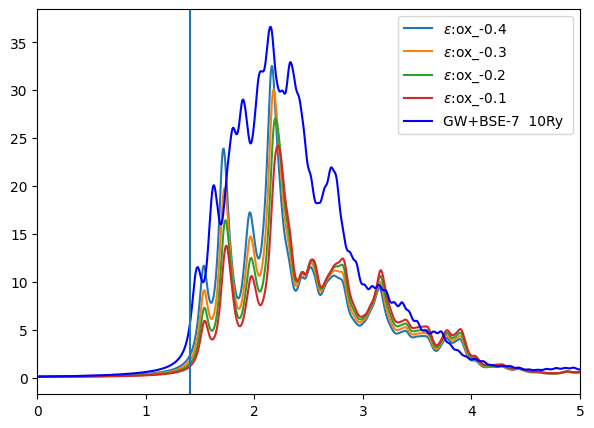

In [74]:
data = sorted(files, key=extract_number)
d2plot = [np.loadtxt(i) for i in data]

plt.figure(figsize=(7,5))
for i in range(len(data)):
    plt.plot(d2plot[i][:,0],d2plot[i][:,1],label=fr"$\varepsilon$:{data[i].split('/')[-2].split('_out')[0]}")

plt.plot(bse7[:,0],bse7[:,1],"b",label="GW+BSE-7  10Ry ")

plt.axvline(x=1.404,ymin=0,ymax=50)
#plt.ylim([0,10])
plt.xlim([0,5])
plt.legend()
plt.show()

## TDDFT-LRC Gau-PBE

In [83]:
files = find_data("TDDFT-LRC/Gau-PBE/calc-3","eps")
sorted_files = sorted(files, key=extract_number)
sorted_files

['TDDFT-LRC/Gau-PBE/calc-3/ox_-0.1_out/o-ox_-0.1_run.eps_q1_inv_LRC_dyson']

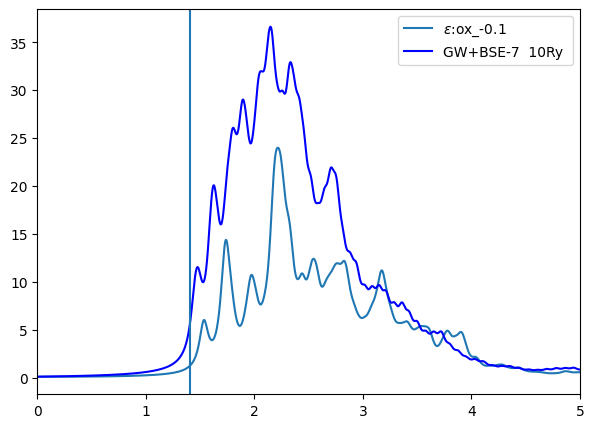

In [81]:
data = sorted(files, key=extract_number)
d2plot = [np.loadtxt(i) for i in data]

plt.figure(figsize=(7,5))
for i in range(len(data)):
    plt.plot(d2plot[i][:,0],d2plot[i][:,1],label=fr"$\varepsilon$:{data[i].split('/')[-2].split('_out')[0]}")

plt.plot(bse7[:,0],bse7[:,1],"b",label="GW+BSE-7  10Ry ")

plt.axvline(x=1.404,ymin=0,ymax=50)
#plt.ylim([0,10])
plt.xlim([0,5])
plt.legend()
plt.show()